<a href="https://colab.research.google.com/github/AbhiramPollur/ExploratoryDataAnalysis/blob/main/21BDS0383.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/supermarket_sales.csv"
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
print("Dataset Head:")
print(df.head())


Dataset Head:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   01/05/19   
1  Electronic accessories       15.28         5   3.8200   80.2200   03/08/19   
2      Home and lifestyle       46.33         7  16.2155  340.5255   03/03/19   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   02/08/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415   

In [4]:
# Explore Dimensions
print("\nDataset Dimensions:", df.shape)



Dataset Dimensions: (1000, 17)


In [5]:
# Summary of the dataset
print("\nSummary of Dataset:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())



Summary of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   998 non-null    object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  999 non-null    object 
 13  cogs                     1000 non-null   float64
 14  gros

In [6]:
# Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     2
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    1
cogs                       0
gross margin percentage    1
gross income               0
Rating                     1
dtype: int64


In [7]:
# Data Cleaning (if required)
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New dataset shape: {df.shape}")



Number of Duplicate Rows: 0



Univariate Analysis:


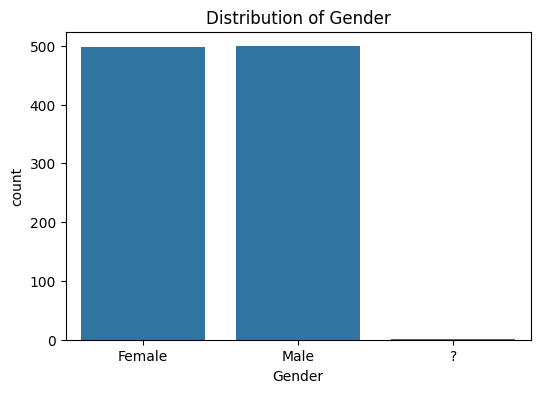

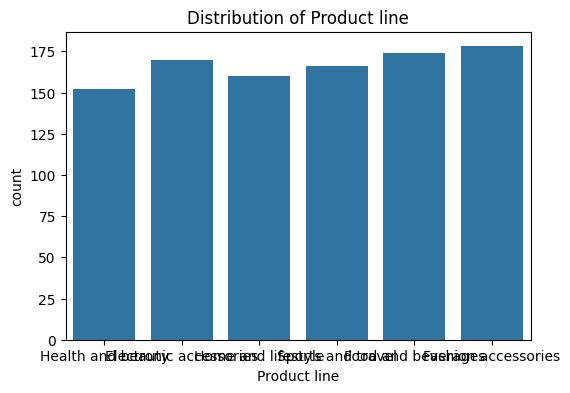

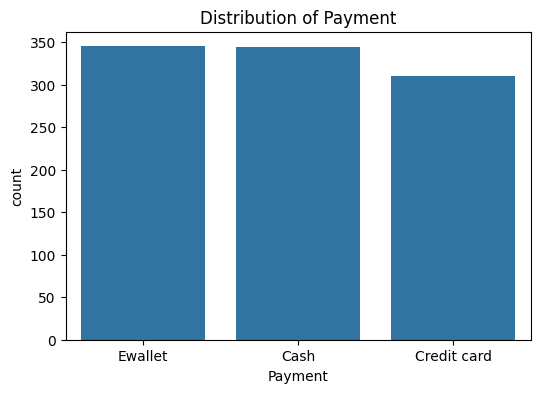

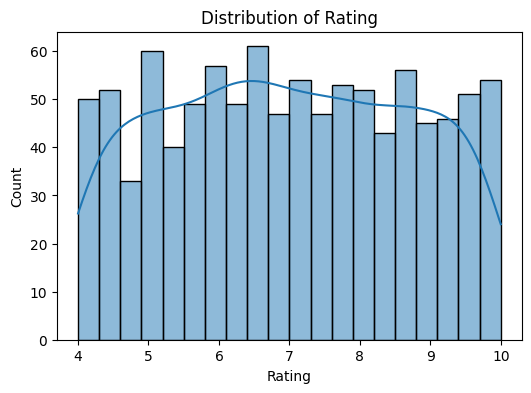

In [8]:
# Univariate Analysis
print("\nUnivariate Analysis:")
columns_to_analyze = ['Gender', 'Product line', 'Payment', 'Rating']
for col in columns_to_analyze:
    plt.figure(figsize=(6, 4))
    if df[col].dtype == 'object':
        sns.countplot(data=df, x=col)
    else:
        sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()



Bivariate Analysis:


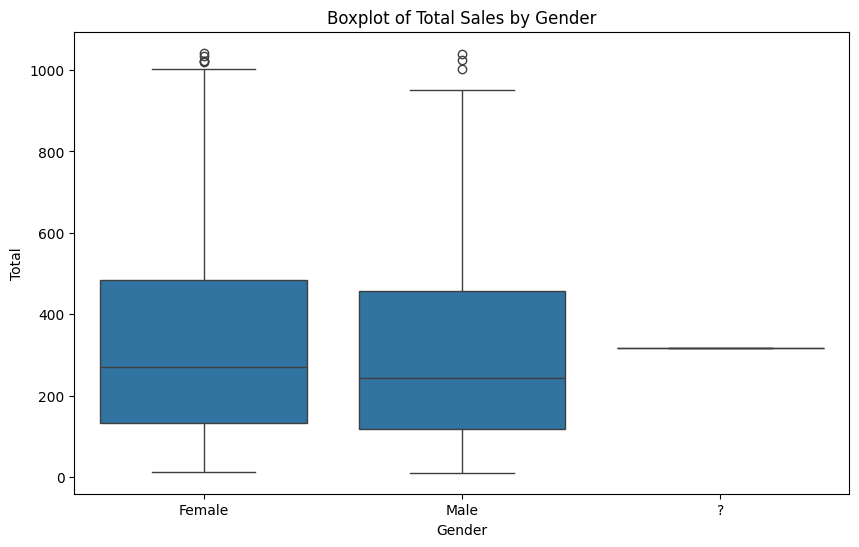

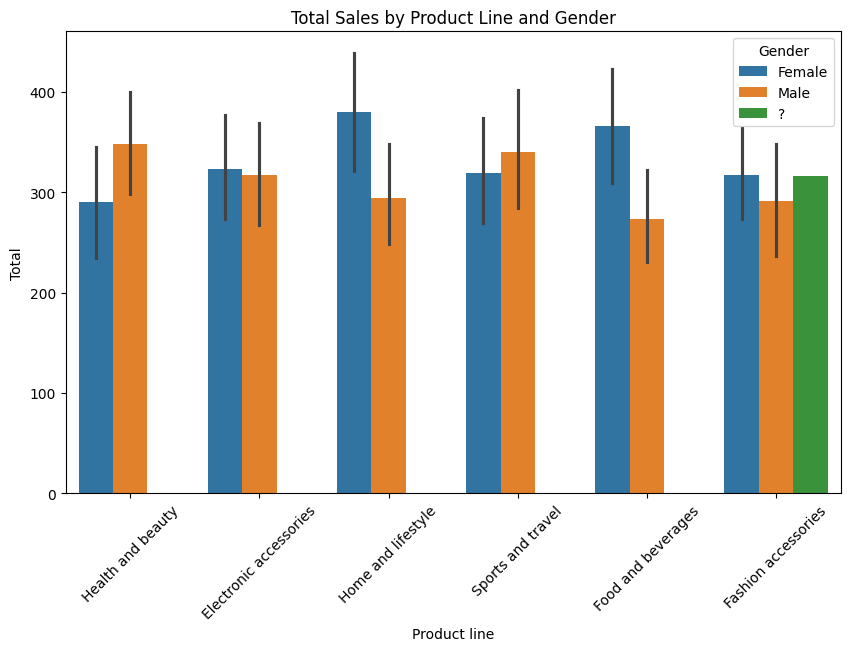

In [9]:
# Bivariate Analysis
print("\nBivariate Analysis:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Total')
plt.title("Boxplot of Total Sales by Gender")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Product line', y='Total', hue='Gender')
plt.title("Total Sales by Product Line and Gender")
plt.xticks(rotation=45)
plt.show()



Multivariate Analysis:


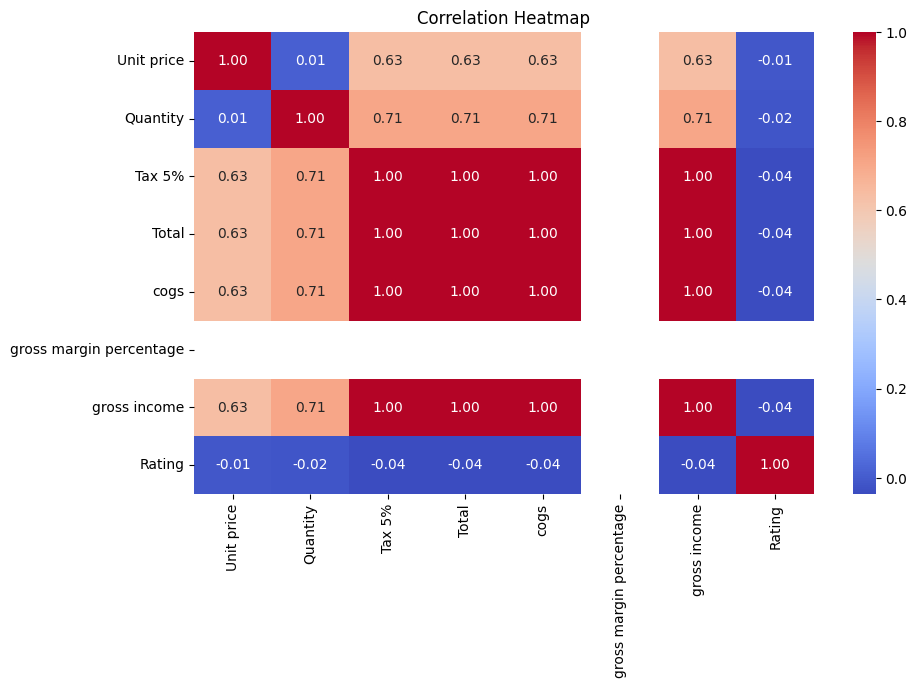

In [10]:
print("\nMultivariate Analysis:")
# Ensure numeric columns only for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# Grouping
branches = df['Branch'].unique()
numeric_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-14-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


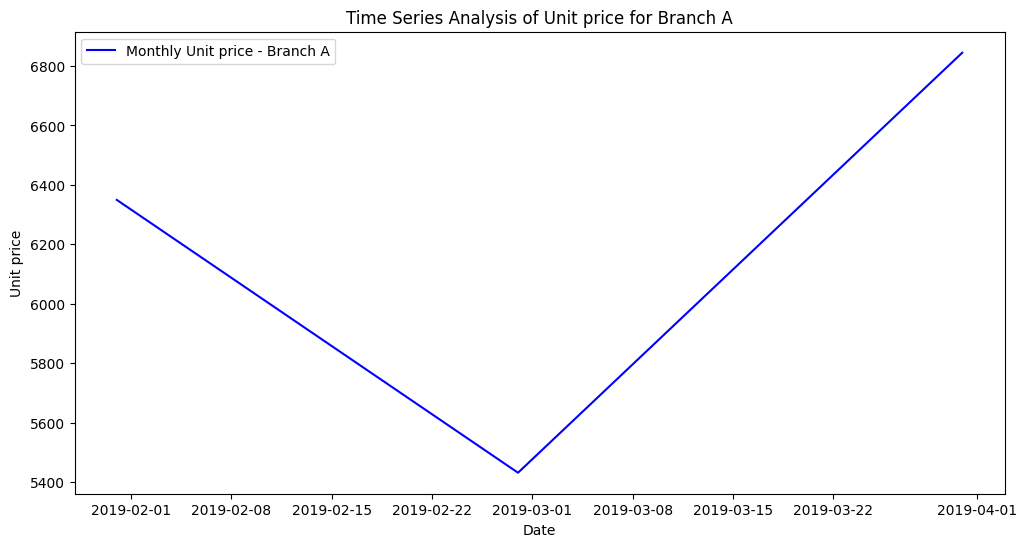

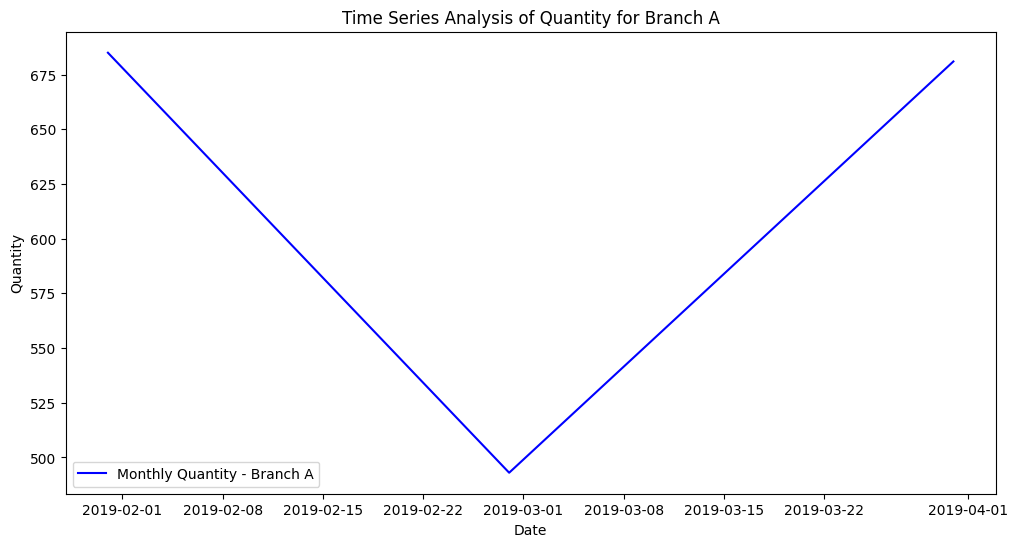

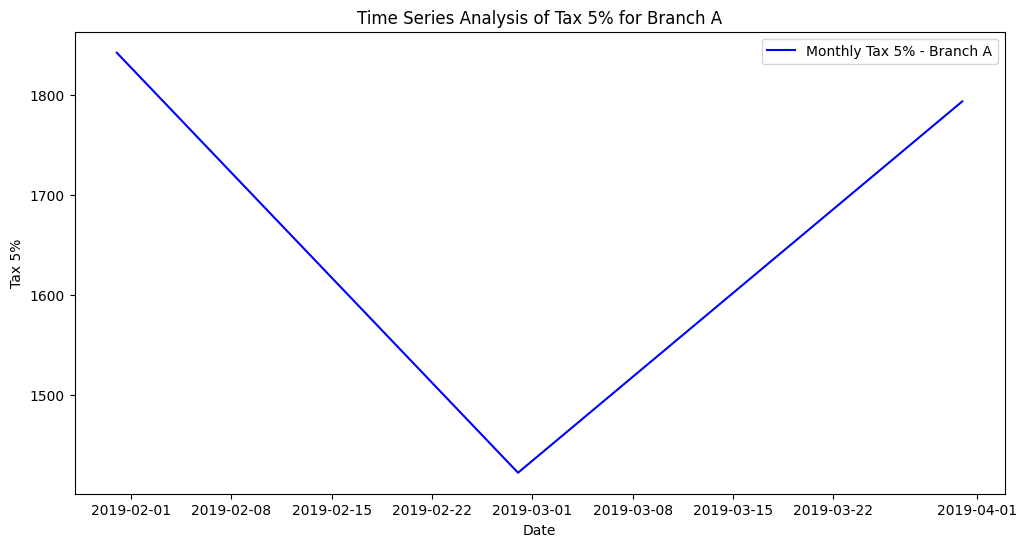

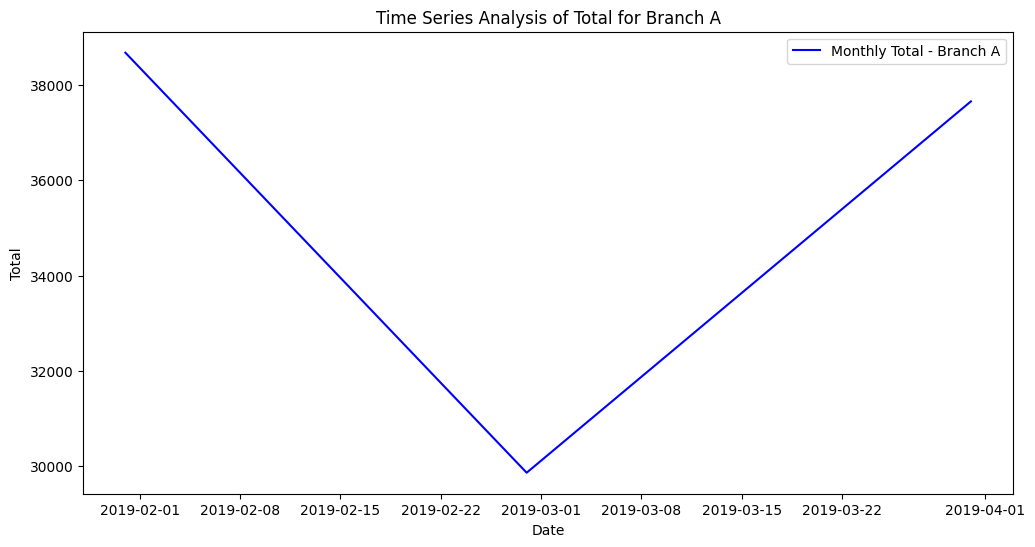

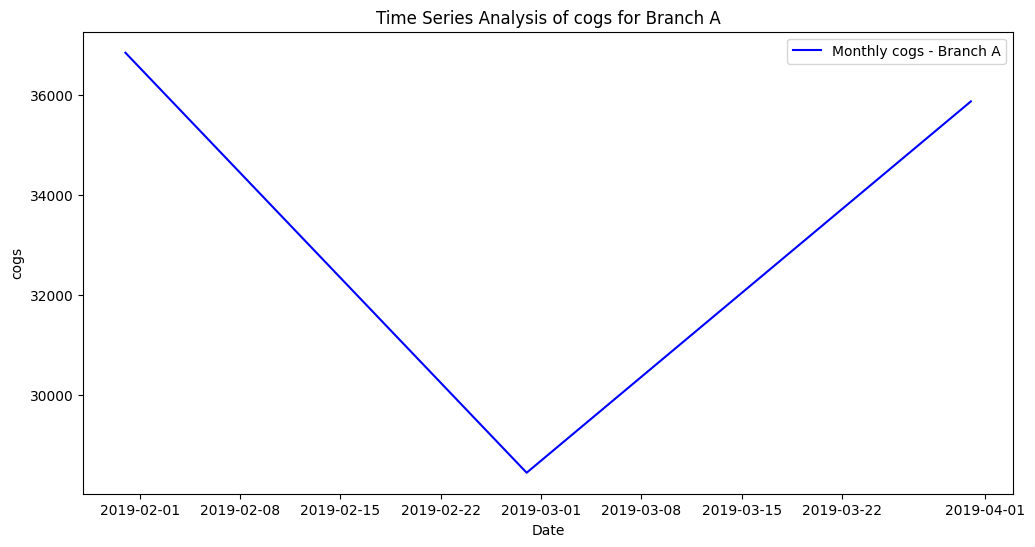

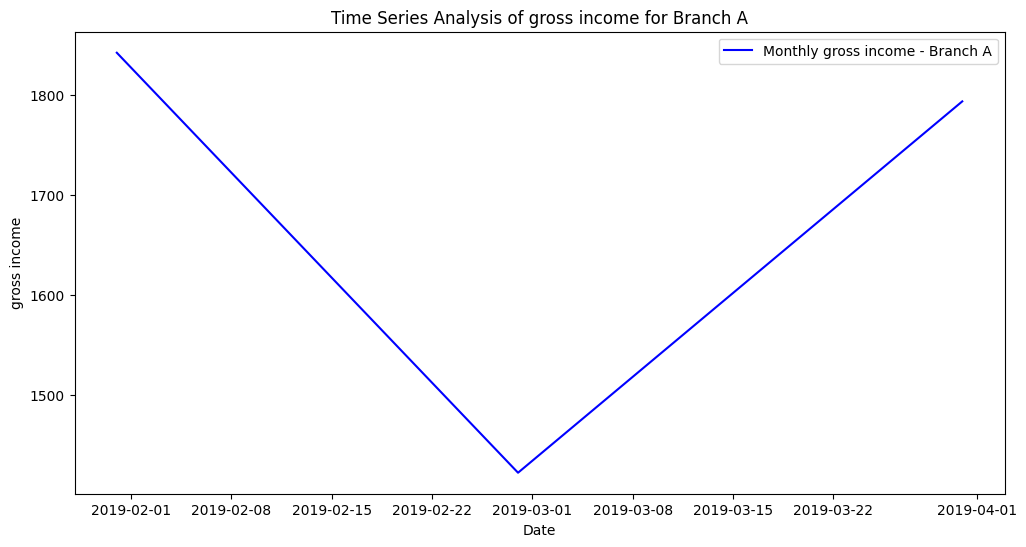

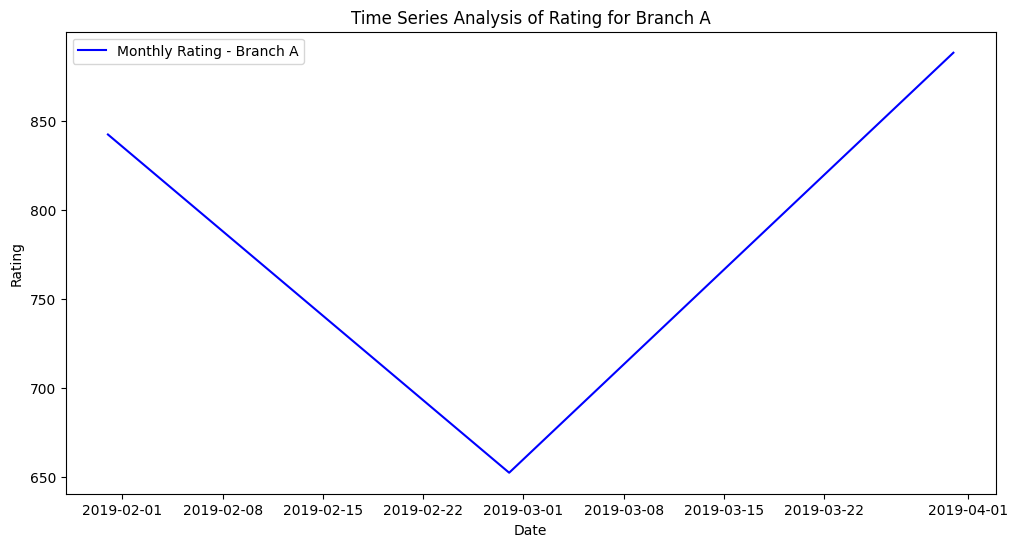

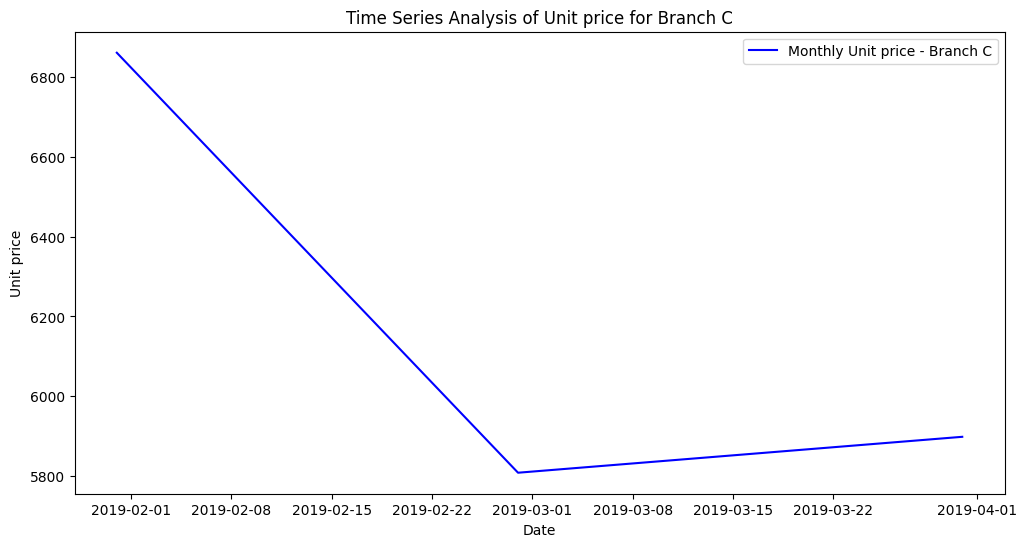

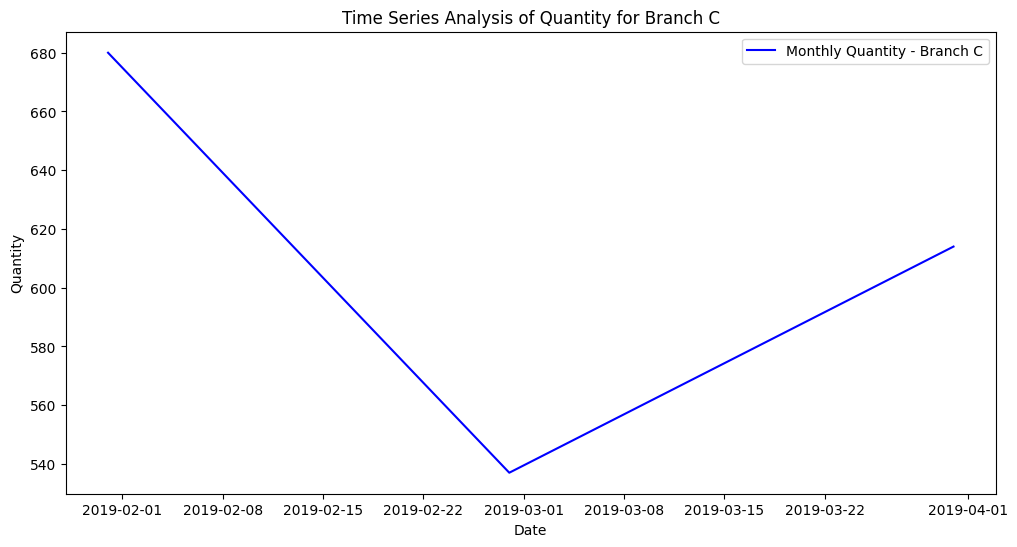

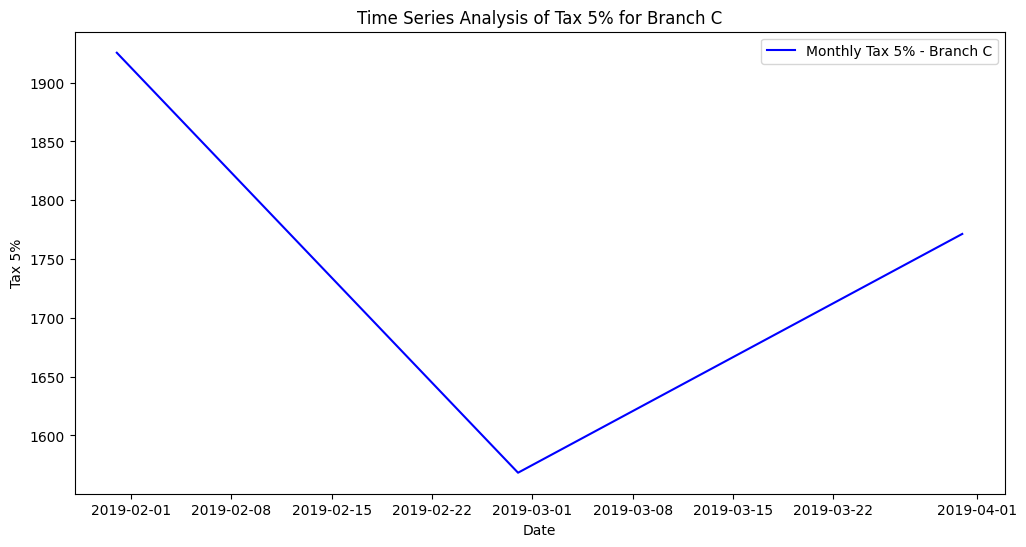

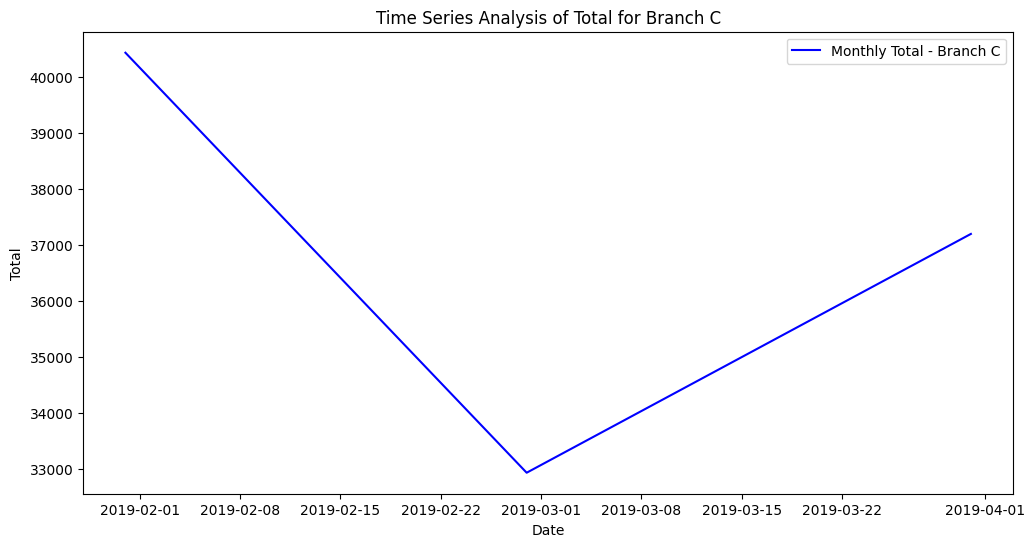

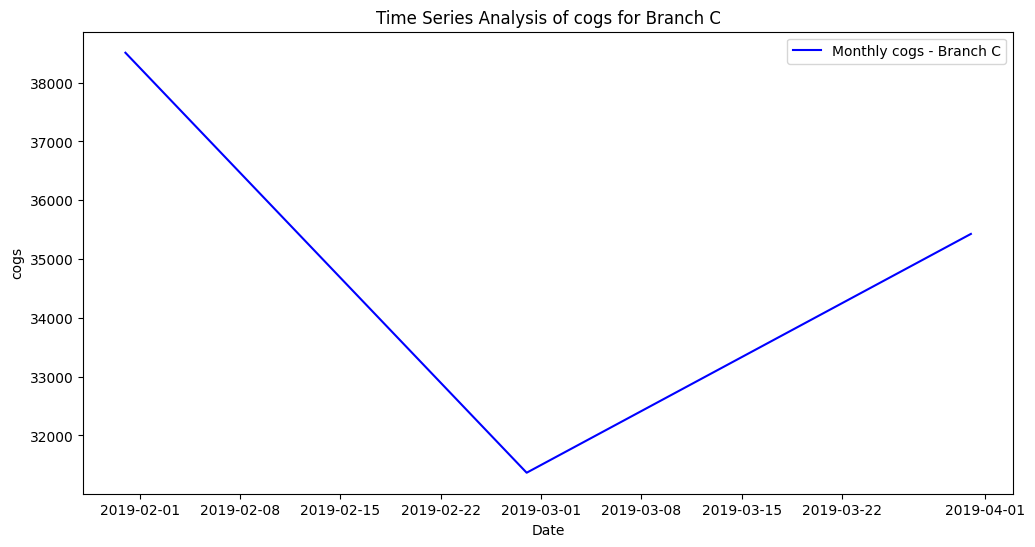

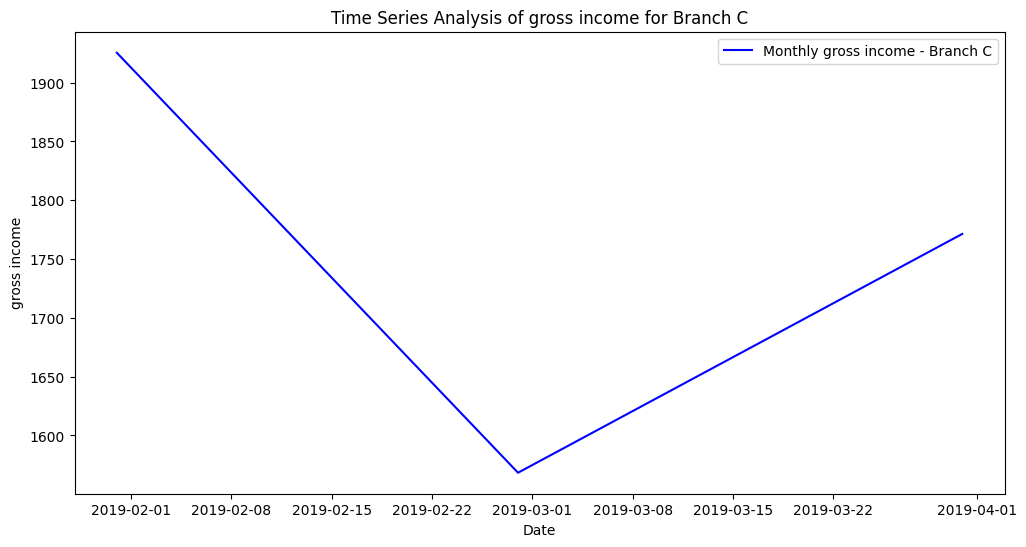

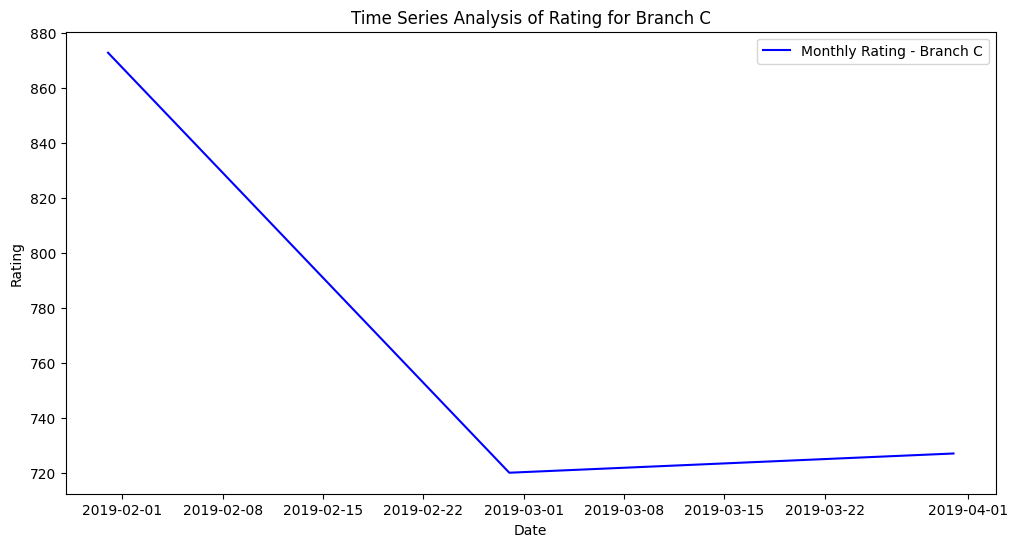

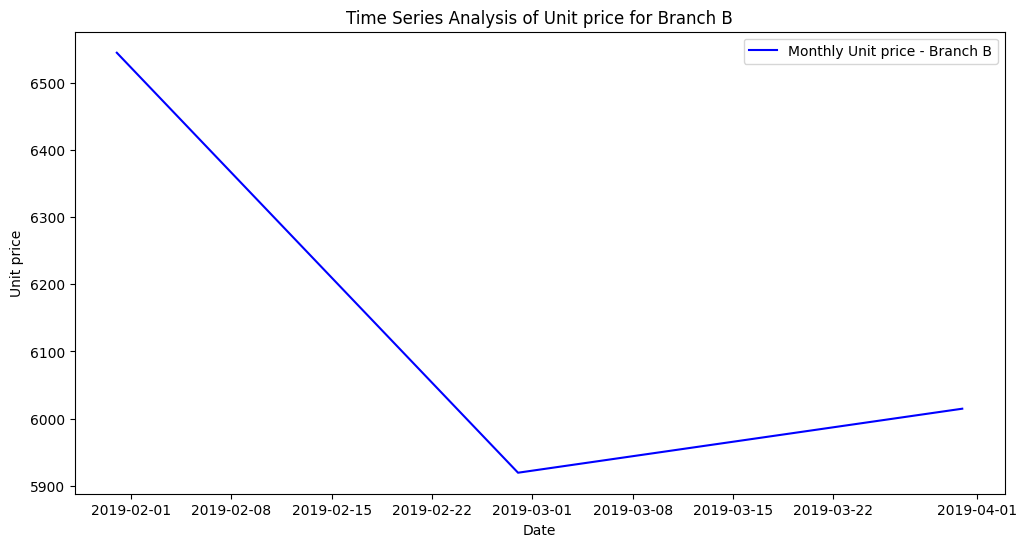

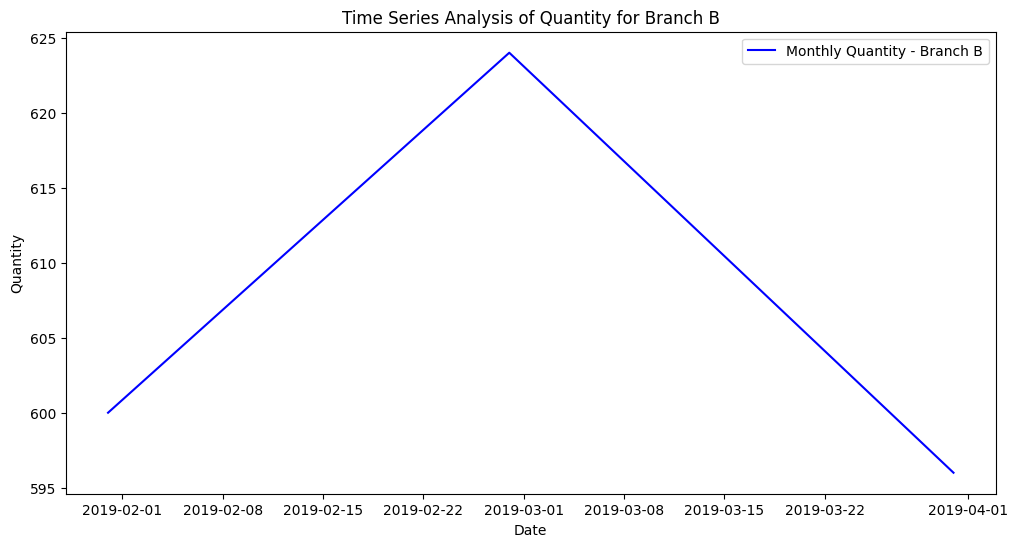

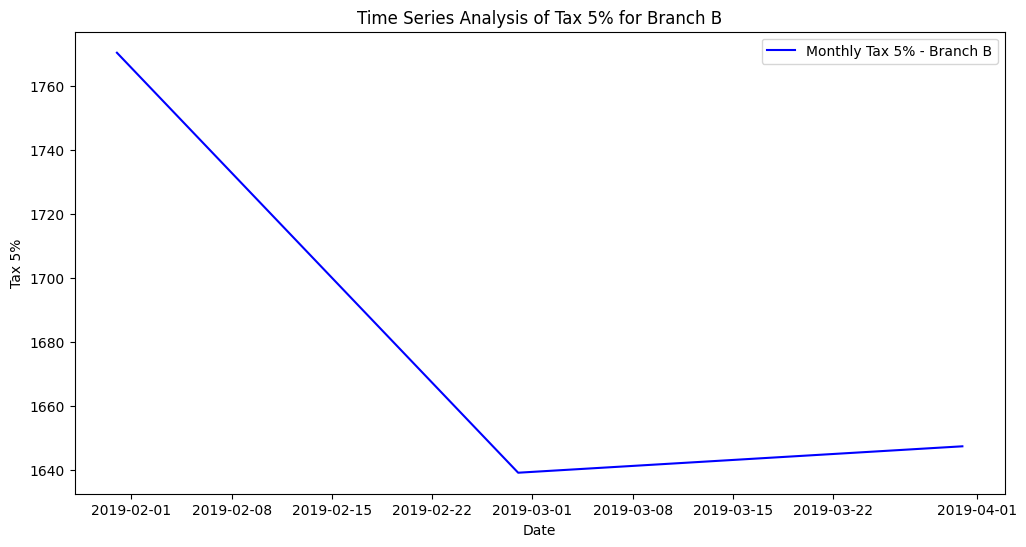

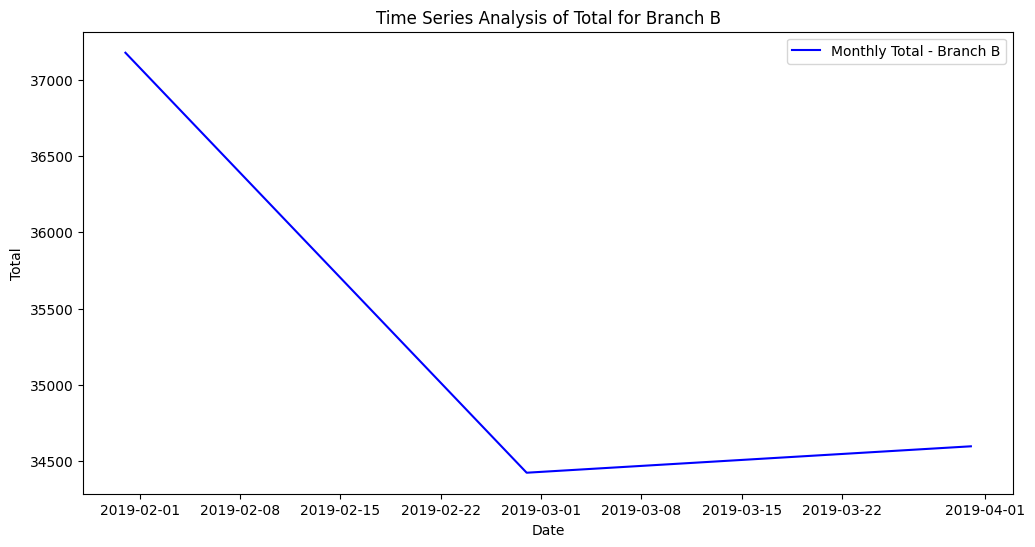

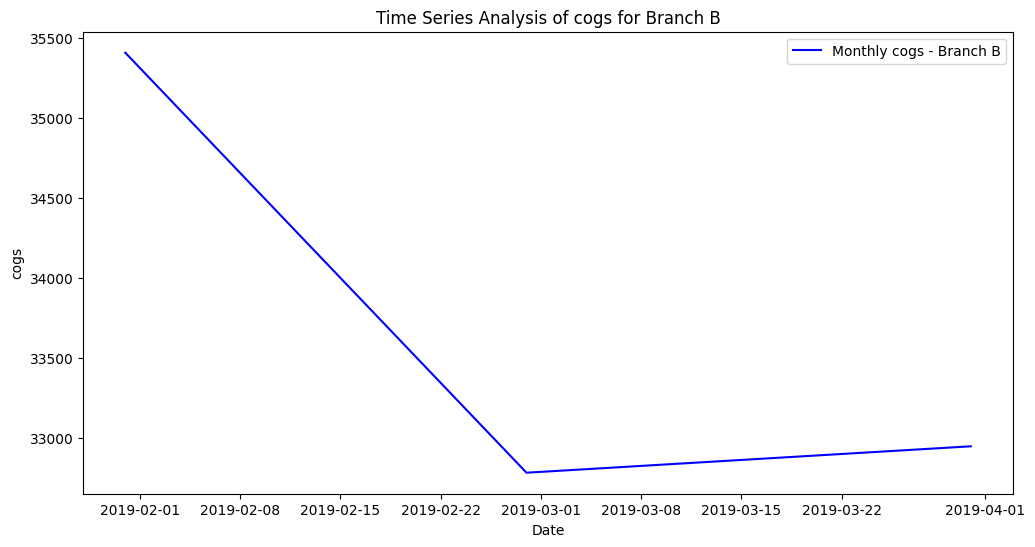

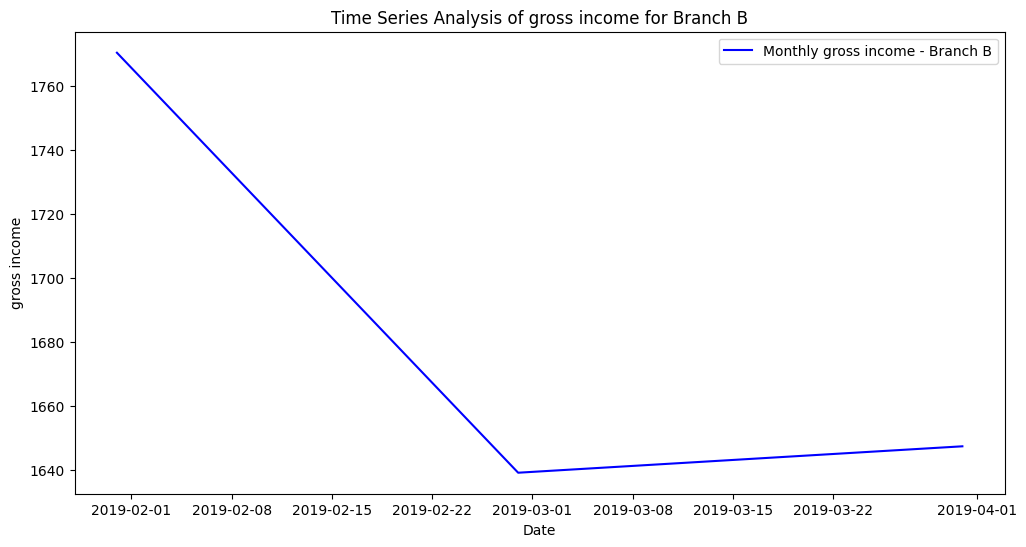

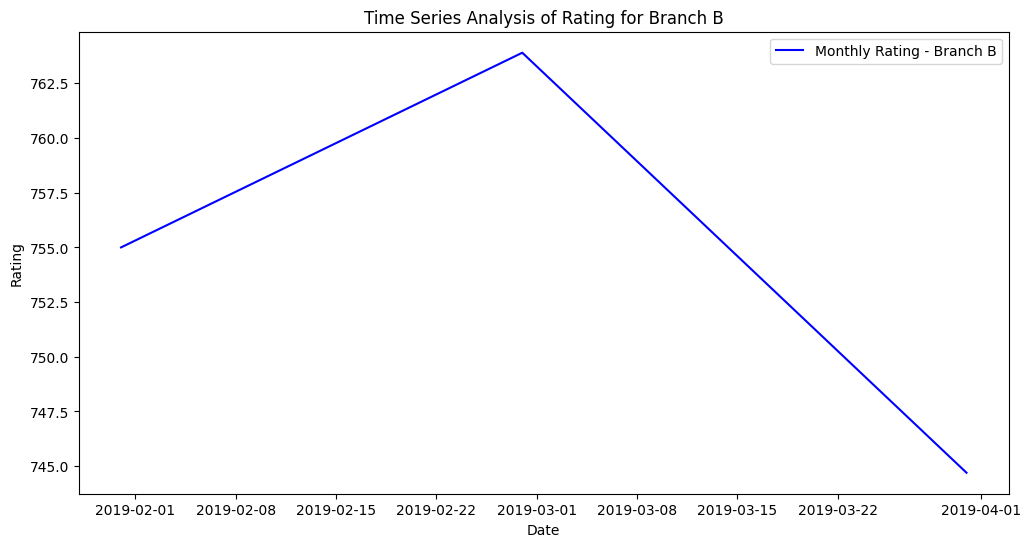

In [16]:
for branch in branches:
    branch_df = df[df['Branch'] == branch]
    branch_df = branch_df.set_index('Date').resample('ME').sum()
    for column in numeric_columns:
        # Plot time series
        plt.figure(figsize=(12,6))
        plt.plot(branch_df.index, branch_df[column], label=f'Monthly {column} - Branch {branch}', color='blue')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.title(f'Time Series Analysis of {column} for Branch {branch}')
        plt.legend()
        plt.show()